<style>
@import url('https://fonts.googleapis.com/css2?family=Fira+Sans:wght@400;700&display=swap');
    
body {
h1, h2, h3, h4, h5, h6 {
    font-family: 'Fira Sans';
}
</style>

# Un Modelo de Negociación Coaseana Basado en Agentes 
## *Trabajo final — Grupo 07*

## Integrantes
- Martin Comellas, LU: 557/22, Email: martin@comellas.org
- Santiago Eliges, LU: 38620, Email: saneliges@gmail.com
- Juan Diego Quintero, LU: 598/22, Email: jdquinter@gmail.com


## Índice de Contenidos
1. [Introducción](#1)
    1. [El Problema del Costo Social](#1.1)
    2. [El Teorema de Coase](#1.2)
    3. [Limitaciones Prácticas](#1.3)
       1. [Asignación de los Derechos de Propiedad](#1.3.1)
       2. [Costos de Transacción y Coordinación](#1.3.2)
       3. [Racionalidad e Información Completa](#1.3.3)
       4. [Criticas Basadas en la Teoría de Juegos](#1.3.4)
       5. [Efectos Riqueza](#1.3.5)

2. [El Modelo](#2)
    1. [Objetivo](#2.1)
    2. [Hipótesis](#2.2)
    3. [Representación](#2.3)
        1. [Simplificaciones](#2.3.1)
        2. [Esqueleto y Estructura General](#2.3.2)
            1. [Los Agentes y sus Agrupaciones](#2.3.2.1)
            2. [Disposición Topológica de los Agentes](#2.3.2.2)
            3. [Cantidad Máxima de Derechos de Generación](#2.3.2.3)
            4. [Momento en el Tiempo](#2.3.2.4)
        3. [Algoritmos y Estructuras de Datos](#2.3.3)
            1. [Agente](#2.3.3.1)
            2. [Grafo](#2.3.3.2)
            3. [DSUGroups](#2.3.3.3)
            4. [Simulación](#2.3.3.4)
        4. [Gráficos Varios](#2.3.4)
            1. [Fracciones de Cantidad de Derechos de Contaminación](#2.3.4.1)
            2. [Fracciones de Utilidad Ofrecida](#2.3.4.2)
            3. [Gráficos de Curvas de Utilidad](#2.3.4.3)
            
 3. [La Simulación](#3)
    1. [Observaciones](#3.1)
        1. [Tenencia de Derechos en Base al Costo de Transacción](#3.1.1)
        2. [Topología del Grafo](#3.1.2)
        3. [Metricas Varias de la Simulación](#3.1.3)
        4. [Diferencia con Respecto a las Utilidades Teóricas](#3.1.4)
    3. [Intepretación](#3.2)
        1. [Confirmación de la Hipótesis](#3.2.1)
        2. [Conclusiones y Aplicabilidad](#3.2.2)
    4. [Posibles Pasos Futuros](#3.3)
   
            



## 1 - Introducción <a name="1"></a>

A lo largo de este trabajo buscaremos estudiar la capacidad de la negociación Coaseana para internalizar externalidades negativas en situaciones más parecidas a las de la vida real, donde se incumplen los supuestos requeridos para que valga el Teorema de Coase.

A continuación introduciremos el Teorema y sus supuestos principales.

### 1.1 - El Problema del Costo Social <a name="1.1"></a>

Siempre que un actor económico racional realice una acción cuyos costos no paga en su totalidad, tenderá a realizarla más veces de lo que es socialmente conveniente. De manera similar, siempre que no reciba los beneficios, tenderá a realizarla menos veces de lo que el resto de la sociedad hubiese preferido. Estos costos o beneficios generados por un actor pero incurridos por otro se llaman "externalidades" ("negativas" y "positivas", respectivamente).

Cuando esto ocurre, existe un potencial de mejora en el bienestar general. Si la externalidad se internalizara —es decir, si los agentes económicos se vieran obligados a asumir los costos y recibir los beneficios que ahora le imponen a otros— entonces ajustarían su comportamiento en consecuencia y la sociedad en su conjunto estaría mejor. Desde Arthur Pigou, la solución aceptada para las externalidades no pecuniarias era que el Estado cobrara un impuesto (o un subsidio) por un monto igual al costo (o beneficio) incurrido por terceros.

Por ejemplo, si una fábrica genera cierta contaminación como efecto secundario del proceso mediante el cual produce sus bienes, y hay algunos habitantes cercanos afectados por esto, entonces el Estado debería medir el costo que la contaminación le impone a los habitantes, y cobrarle un impuesto a la fábrica tal que su costo marginal privado sea igual al costo marginal social. En la práctica, esto rara vez sucede, tanto por razones de opción pública como porque el costo social es en general imposible o imprácticamente difícil de medir.


### 1.2 - El Teorema de Coase <a name="1.2"></a>

En 1960 Ronald Coase publicó un artículo llamado "El Problema del Costo Social", donde afirmo que, si se cumplen ciertos supuestos (que nunca se cumplen en la vida real), los actores económicos involucrados en una externalidad negociaran entre ellos hasta llegar a la distribución de recursos más conveniente posible.

Esto se llamó el "Teorema de Coase": dado agentes racionales, derechos de propiedad bien definidos, costos de transacción y coordinación cero, información completa, y la ausencia de "efectos riqueza", entonces el resultado de la negociación entre los involucrados será (Pareto) eficiente, e invariante respecto a la distribución inicial de derechos de propiedad.

De ejemplo dió el siguiente caso: hay un doctor y un panadero que comparten oficinas vecinas. Como parte de su trabajo, el panadero usa una maquina que hace mucho ruido, causandole un daño enorme al doctor. El panadero podría comprar una maquina menos ruidosa por \\$40, pero el doctor también podría instalar aislación sonora por \\$60: ¿Quién debería hacer qué?

Según el Teorema, llegarán a la misma solución eficiente sin importar si el que tiene el derecho a controlar el nivel de ruido en las oficinas es el doctor o el panadero.
    
Si el derecho lo tiene el doctor, entonces le prohibirá hacer ruido al panadero, que comprará la maquina menos ruidosa. Si el derecho en vez lo tiene el panadero, entonces negociarán entre si y el doctor le pagará entre \\$40 y \\$60 para que compre una maquina menos ruidosa. En los dos casos el resultado respecto a la externalidad será el mismo (aunque no necesariamente la distribución de riqueza).

Tanto como con la solución de Pigou como con la de Coase, aunque a veces puedan mejorar el estado actual, rara vez se cumplen todos los supuestos necesarios para que lleven a sus resultados teóricos. A continuación examinaremos en mayor detalle las limitaciones prácticas de la negociación Coaseana.

### 1.3 - Limitaciones Prácticas

#### 1.3.1 - Asignación de los Derechos de Propiedad

Para que la negociación Coaseana alcance una solución satisfactoria, los derechos de propiedad deben estar bien definidos. Si, en cambio, no están asignados a nadie o están asignados de manera poco clara, la negociación se vuelve muy difícil: podría no ser evidente con quién negociar, o hacer cumplir los acuerdos alcanzados podría ser imposible. 

Incluso si las partes involucradas pudiesen compensar a sus contrapartes actuales, seguirían en riesgo frente a nuevos participantes.
En nuestro modelo, solo examinamos la tesis de eficiencia del Teorema, y no la tesis de invariancia, y asumimos que los derechos de propiedad están bien definidos, lo que nos permite asignarselos todos al inicio de la simulación a un agente de tipo especial (el propietario) cuya única acción es aceptar el mejor conjunto de ofertas posible.

#### 1.3.2 - Costos de Transacción y Coordinación Cero

Los "costos de transacción" son los gastos incurridos en un intercambio económico más allá del precio del producto o servicio en sí. En el mundo real, estos son ubicuos y a menudo muy significativos: cuando alquilas un nuevo departamento, los costos involucrados son mucho más altos que el precio nominal del alquiler: se requiere mucho tiempo y esfuerzo para buscar un lugar barato y satisfactorio, para negociar términos y redactar contratos,y para mover tus pertenencias y hacer cumplir los términos mencionados, en caso de que se incumplan.

El Teorema de Coase requiere costos de transacción bajos o nulos porque, de lo contrario, los costos de la negociación podrían superar los beneficios derivados de resolver la externalidad. Incluso si no lo hicieran, no hay ninguna garantía de que la negociación sea exitosa, y de no poder ponerse de acuerdo los costos de transacción asociados ya los habrán pagado. Algunos pueden no querer correr ese riesgo.

En nuestro modelo, representamos los costos de transacción mediante dos hiperparámetros:

  - El ```costo_transacción``` representa el costo de hacer una oferta al propietario, y de hacerla cumplir, y afecta la distribución de los pesos de las aristas del grafo donde están los agentes. Cada vez que se hace una oferta exitosa, el ofertante "paga" ese costo.

  - El ```multiplicador_de_coordinación``` representa los costos de tiempo y de búsqueda asociados a la cooperación entre los agentes afectados, y determina la probabilidad de que un agente forme un grupo de negociación con sus vecinos en el grafo.

#### 1.3.4 - Racionalidad e Información Completa

El Teorema de Coase requiere agentes racionales e información completa (que los agentes conozcan sus costos y los de los otros, que no tengan información privada, y que sepan que se cumplen estas clausulas) para garantizar un resultado eficiente.

Los agentes de nuestro modelo tienen racionalidad acotada; tienden a tomar decisiones que los benefician, y a no tomar decisiones que los perjudican, pero usan heuristicas de menor costo computacional que no siempre llevan a la solución óptima (ya que esta a veces no está definida). Además, tienen información limitada: no conocen las funciones de utilidad de los demás agentes, ni las ofertas que hicieron.

#### 1.3.5 Criticas Basadas en la Teoría de Juegos

- Problema del "*Free-Rider*": Cuando hay una gran cantidad de agentes involucrados que deben coordinarse para negociar, y cuando los efectos de la externalidad son no-excluibles (es decir, cuando el perjuicio o beneficio afecta simultaneamente a muchos agentes), surge el problema del *free-rider*: a los afectados colectivamente les conviene coordinarse y negociar para internalizar la externalidad, pero a cada afectado individual le conviene abstenerse y dejar que el resto solucione el problema.
  
- Problema del "*Holdout*": Si en el caso de una externalidad negativa los derechos de propiedad relevantes son asignados a un grupo de agentes afectados en conjunto, entonces el generador de la externalidad debe obtener el permiso de todos los *n* afectados. Si *n-1* ya dieron su permiso, el enésimo está incentivado a demandar más dinero, ya que su consentimiento será más valioso.

(este estilo de problemas llevan al "Problema del Núcleo Vacío", por el cual aún con derechos de propiedad bien definidos y costos de transacción cero puede ser que no se llegue a una solución eficiente, ya que no existe ningun estado estable donde ningun grupo de agentes pueda mejorar su situación) 

Nosotros no consideramos el problema del *free-rider* en nuestra simulación, y evitamos el del *holdout* al otorgarle los derechos sobre la externalidad a un único agente propietario.

#### 1.3.6 - Efectos Riqueza

Si consideramos que la utilidad marginal proveida por una unidad adicional de dinero es decreciente, como lo es para casi cualquier bien, entonces los agentes estarán dispuestos a pagar distintas cantidades de dinero por el mismo bien o servicio si son más o menos ricos. En particular, si hay efectos de riqueza se puede romper la tésis de invarianza del Teorema de Coase, ya que la distribución inicial de derechos puede afectar la solución final.

Nosotros asumimos que no hay efectos riqueza al diseñar nuestro modelo.

## 2 - El Modelo <a name="2"></a>

### 2.1 - Objetivo <a name="2.1"></a>
El objetivo de nuestro modelo es lograr representar la negociación coseana con suficiente fidelidad con tal de poder ver como se comportan las interacciones que la componen a medida que nos alejamos de los supuestos. 

### 2.2 - Hipótesis <a name="2.2"></a>
Dada una configuracion de un sistema de negociacion coseana, definimos como la utilidad total la sumatoria de las utilidades de cada uno de sus agentes. Definimos un estado optimo del sistema como una configuracion de distribucion de derechos que maximize la utilidad total, dicha utilidad total la llamaremos la utilidad total optima.
Nuestra hipotesis consta de que al romper los supuestos de costos de transaccion y cordinacion nulos, varian monotonamente dichos parametros, el sistema variara su configuracion incrementando monotonamente la diferencia entre la utilidad total optima y la utilidad total del sistema. Nuestra hipotesis deja implicito que a nunca al alejarse de los supuestos, la utilidad total del sistema se alejara de la utilidad total optima. 
Esto no necesariamente implica proporcionalidad directa ya que si al incrementar la distancia a los supuestos, la distancia a la utilidad optima se mantiene igual, esto calificaria como variar monotonamente. 

### 2.3 - Representación <a name="2."></a>
A lo largo de la siguiente sección se explicara como se eligió representar el sistema de negociación coseana de manera computacional, lo que incluye que simplificaciones del sistema se tomaron, que estructuras de datos se ven involucradas y los algoritmos que relacionan dichas estructuras para dar a lugar a la representación de las negociaciones. 

### 2.3.1 - Simplificaciones <a name="2.3.2"></a>
Son varias las simplificaciones que se decidieron tomar a la hora de modelar la negociación coseana. 
- La primeras simplificaciones tratan sobre algunos supuestos del Teorema de Coase, especificamente con respecto a la racionalidad de los agentes y la informacion completa. Un agente racional perfecto requiere que se tome la mejor decisión en todo momento, como dicha decisión depende del resto de agentes, para cada decisión el agente deberia modelar al resto de agentes y sus decisiones. Pero esto requiere que tambien el resto de agentes tengan un modelo de de nuestro primer agente. Esto genera una incongruencia debido a que para modelar la decision optima de un agente debo ya tener modelada la decision optima del resto de agentes y por lo tanto la de uno mismo. Creemos que esto podria ser abordado con un enfoque desde Teoria de Juegos, pero introduciria problemas propios de la diciplina como puede ser el problema de free-riders entre otros. Los agentes fueron modelados de manera semi-racional, nunca toman una decisión que los perjudique. Un argumento similar puede ser utilizado para la informacion perfecta. Debido a esto no esperamos necesariamente que la utilidad total del sistema sea igual a la utilidad total optima, aunque esto puede pasar. Esto no impide verificar la monotonia con respecto a los otros supuestos.
- La siguiente simplificacion fueron con respecto al tipo de Negociacion Coseana. Se decidio que la externalidad es negativa, y para generar dicha externalidad es necesario adquirir derechos de generacion los cuales son alquilados por un valor fijo hasta que el propietario decida que dichos derechos seran revocados. El propietario de los derechos de generacion se lo llama propietario, todos se consideran capaces de generar la externalidad pero se denomina generadores a aquellos individuos que la valoran positivamente, y afectados a aquellos que la valoran negativamente. Un agente puede adquirir derechos de generacion y no utilizarlos, pero por semi-racionalidad de los agentes todo generador los utiliza y todo afectado no los utiliza. 
- Los unicos agentes capaces de agruparse son los afectados.
- La externalidad se considerara una contaminación. Esto se hace con el espiritu de facilitar la conceptualización del modelo. El nivel de contaminacion seria la cantidad de derechos de generación que estan asignados a generadores.
- Los derechos de generación son discretos.
- No encontramos un argumento semi-racional para separarse de un grupo, por lo que no lo modelamos. Esto causa que el modelo asintoticamente tienda a formar un unico grupo de afectados, si esto es deseable o modela correctamente la realidad es criticable, por lo que generalmente se busca un equilibro entre la dificultad de crear grupos y y el tiempo que pasa en la simulación.


### 2.3.2 - Esqueleto y Estructura General <a name="2.3.2"></a>
El modelo consiste principalmente de los siguientes componentes:
- Agentes y sus agrupaciones.
- Disposicion Topologica de los agentes.
- Una cantidad maxima de derechos de generación
- Un momento en el tiempo.


#### 2.3.2.1 Agentes y sus Agrupaciones <a name="2.3.2.1"></a>
Un unico agente sera del tipo Propietario, el resto sera un Generador o un Afectado. Los Generadores y los Afectados realizan ofertas por los derechos de contaminación. Cada agente con la excepción de el Propietario tendra a su disposicion una curva de utilidad en función de la contaminación. Los generadores la valoran en funcion a la cantidad total de derechos que ellos acumulan. Los afectados la valoran en funcion al nivel de contaminación.
Inicialmente cada agente se considera su propio grupo, a medida que la simulacion evoluciona dos agentes afectados pueden pasar a formar parte del mismo grupo. Esto proceso, dado un nivel de contaminación, se decide a traves de un proceso Bernoulli con una probabilidad pesada por un estimador de la derivada de la curva de utilidad del afectado. 
Cada grupo puede realizar de ninguna a dos ofertas por unidad de tiempo. Siempre se computara una oferta, en el caso de que la utilidad ofrecida de esta sea menor al costo de transacción, esta sera ignorada. En el caso en el cual el propietario haya aceptado una oferta de dicho grupo, el grupo debera adicionalmente realizar la misma oferta, independientemente si el grupo crecio en integrantes o no. Las posibles combinaciones de computo de ofertas son:
- Ninguna: No se tenia oferta vieja aceptada y la nueva oferta ofrece menos que el costo de transacción
- Una: Se ofrece la oferta vieja debido a que la oferta nueva es por una cantidad de derechos menor a la actual, o no se tiene una oferta vieja y se realiza una.
- Dos: Existe una oferta vieja y la oferta nueva excede en cantidad de derechos a la oferta vieja.
Se considera que las ofertas son realizadas por una fracción del movimiento posible, al precio de alguna otra fracción de lo que se valora dicho movimiento donde las fracciones son sampleadas de manera probabilistica. La esperanza de la fraccion de la utilidad ofrecida va incrementando cada vez que no se le acepta una oferta a un agente.



#### 2.3.2.2 Disposición Topologica de los agentes  <a name="2.3.2.2"></a>
La disposición topologica de los agentes viene dada por un grafo conexo aleatorio. La densidad de dicho grafo altera la cantidad de aristas, moviendose desde ser un arbol, a ser completo. Cada nodo representa a un agente y cada arista la conexion entre dos agentes. Las aristas tienen un peso aleatorio que indica el costo de transmitir una oferta a traves de dichos agentes. El costo de transacción para un grupo esta definido como el menor de los caminos minimos entre el propietario y cada agente del grupo. 
Para la formación de nuevos grupos se considera un nodo y cada uno de sus vecinos, si el resultado del proceso probabilistico es positivo, se unen ambos grupos.
Se considera que las ofertas son grupales, donde la oferta es a cambio de una fraccion de la suma de las utilides del grupo, por lo tanto los derechos de contaminación son grupales, y no tienen necesariamente una distribucion indvidual significativa.  

#### 2.3.2.3 Cantidad Máxima de Derechos de Generación <a name="2.3.2.3"></a>
Esto es invariante con respecto al momento del tiempo, por lo que en cada momento la suma de los derechos de los grupos debera ser menor al nivel de contaminación maxima. En nuestro modelo el nivel de contaminación maxima es estrictamente 100. Estos derechos se encuentran discretizados en unidades por lo que los posibles nveles de contaminación son 101, de esta manera se induce desde la curva de utilidad para un individuo, su tabla de utilidad, la cual es una discretización de la curva mediante el sampleo de esta en cada una de los posibles niveles de contaminación. 

#### 2.3.2.4 Momento en el Tiempo <a name="2.3.2.4"></a>
Los momentos en el tiempo en la simulación estan definidos por la unidad tick, la cual empieza a contrabilizarse desde el 0 inclusive. En cada tick sucede el ciclo principal de la simulación, por lo que se actualizan los grupos, se realizan las ofertas por grupo, el propietario elige una combinación optima de ofertas que maximice su utilidad ganada, se notifica a los grupos si el propietario acepto o rechazo sus ofertas para que estos ajusten las esperanzas de las fracciones de utilidad ofrecidas de ser necesario y por ultimo se actualiza el nivel de contaminación. 



### 2.3.3 Algoritmos y Estructuras de Datos <a name="2.3.3"></a>
Las clases definidas para modelar el sistema son varias. La clase principal es llamada simulación, a traves de esta es que sucede todo. Primero veremos la composición de algunas clases relevantes y luego veremos la composición de la clase simulación. 

Las clases relevantes que componen a simulación son las siguientes:
- Agente
- Grafo
- DSUGroups

#### 2.3.3.1 Agente <a name="2.3.3.1"></a>
```
class Agente:
        def __init__(self, identificador, tipo):
               self.id = identificador
               self.tipo = tipo
               self.funcion_utilidad = ...
               self.tabla_de_utilidad = ...
               ...
```
El código del Inicializador de un agente es bastante explicativo. La funcion de utilidad de un agente no es generada por si mismo, si no que es posteriormente definida.



#### 2.3.3.2 Grafo <a name="2.3.3.2"></a>
```
class Grafo:
    def __init__(self):
        self.adyacencias = []  
        ...   
```
La estructura de datos que se utiliza para representar al grafo es una lista de adyaciencias, donde la posición en la lista es equivalente al id del agente, y la posicion 0 siempre corresponde al propietario

El verdadero metodo que genera un grafo aleatorio es el siguiente:

```
def generador_grafo(self, densidad_conexion, param_transaccion, cant_agentes):
        ...
	# Definicion de cantidad de aristas y cuales son
        cantidad_de_aristas = int((cant_agentes - 1)*(1-densidad_conexion) + densidad_conexion*cant_agentes*(cant_agentes-1)*1/2)
        pares_de_adyacencias = []
        for i in range(cantidad_de_aristas):
            repeated=True
            while repeated:
                repeated = False
                a= random.randint(0, cant_agentes-1)
                b= random.randint(0, cant_agentes-1)
                if(a is not b):
                    t1=(a,b)
                    t2=(b,a)
                    for pair in pares_de_adyacencias:
                        if pair == t1 or pair == t2:
                            repeated=True
            pares_de_adyacencias.append((a,b))
            cantidad_de_aristas -= 1

        # Definicion de costos y lista de adyacencia
        lista_de_adyaciencia = [[] for _ in range(cant_agentes)]

        for pair in pares_de_adyacencias:
            costo= f_costo_arista(param_transaccion)
            a, b= pair
            lista_de_adyaciencia[a].append((b, costo))
            lista_de_adyaciencia[b].append((a, costo))
            
        # Inicializacion y return del grafo
        self.adyacencias= lista_de_adyaciencia
        self.generado=True
```
Resumidamente, para definir la cantidad de aristas se hace una interpolación lineal en base al parametro de densidad de conexión entre la cantidad de aristas de un arbol y de un grafo completo. Posteriormente define entre que nodos se formaran estas aristas, y por ultimo define el costo de transacción de cada arista en base al parametro de transacción.

La lista de caminos minimos iniciales se encuentra utilizando el algoritmo de Dijkstra enraizado en el propietario.


#### 2.3.3.3 DSUGroups <a name="2.3.3.3"></a>

Posiblemente la estructura mas compleja de la simulación.


```
class DSUGroups:
    
    def __init__(self, list_nodes, sim=None):
        
        self.__lista_padres = list_nodes
        
        ...

```
La funcionalidad de DSUGroups es la de una interfaz con la cual la simulacion pueda interactuar con los grupos directamente en vez de con los agentes. Esto facilita la logica del ciclo de simulación, a cambio de encapsular toda esa complejidad en esta otra clase. La idea principal esta basada en un Disjoint Set Union, al cual se le agregaron mas estructuras para lograr monitorizar de manera correcta las distintas caracteristcias de un grupo. Para esto se modifico el metodo de union, y se agregaron metodos para notificar a un grupo si se rechazo su oferta, y para que un grupo sepa si tiene una oferta vieja aceptada a la hora de realizar una nueva. 

Algunos metodos varios de esta clase son:

```
# La distancia minima del grupo al que forma parte el nodo 
def dist_min_al_propietario(self, node):
	...

# Lista de integrantes del grupo al que forma parte el nodo 
def integrantes(self, nodo):
	...

# Booleano que indica si el grupo del nodo realizo una oferta este tick 
def realizo_oferta_este_tick(self, nodo):
	...

# Lista con un representante por grupo excluyendo al propieatrio
def lista_grupos(self):
	...
```

Los metodos mas importantes son aquellos relacionados con que un grupo realize sus ofertas. 

Una oferta consiste de: (cantidad de derechos de contaminacion a comprar, utilidad ofrecida, nodo representante del grupo, fraccion de utilidad ofrecida)

En el caso de que la oferta sea de un afectado el primer valor de la tupla se signa negativamente.

Este sigue la siguiente logica:



```
def ofertar_con_su_grupo(self, node):
            
        
      
            # Guardas para que un grupo no oferte dos veces
            ...
                
            ### El nodo es un generador
            if(self.sim.lista_de_agentes[node].tipo == "generador"):
                               
                agente=self.sim.lista_de_agentes[node]
                
                #####
                media_x=0
                varianza_x=0.25
                varianza_u=0.05
                ####
                
                movimiento_en_contaminacion=int((self.__sim.nivel_de_contaminacion_maximo)*self.fraccion_en_x(media_x, varianza_x))
                utilidad_en_tabla = agente.tabla_de_utilidad[movimiento_en_contaminacion]
                
                if(movimiento_en_contaminacion==0 and utilidad_en_tabla>0):
                    raise ValueError('Error: Oferta desplazamiento 0 utilidad positiva')  
                     
                fraccion_de_utilidad = self.fraccion_en_x(self.__lista_pisos_de_fracciones[self.find_group(node)], varianza_u)
                utilidad_ofrecida = utilidad_en_tabla*fraccion_de_utilidad - self.dist_min_al_propietario(node)
                oferta_nueva=(movimiento_en_contaminacion, utilidad_ofrecida, self.find_group(node), fraccion_de_utilidad)

            
                if self.__lista_ofertas[self.find_group(node)][1]==False:
                    #No le aceptaron ofertas anteriores
                    if oferta_nueva[1] > 0:
                        return [oferta_nueva]
                    else:
                        self.fracaso_oferta(node)
                        return []
                    
                else:
                    oferta_vieja=self.__lista_ofertas[self.find_group(node)][0]
                    
                    if(oferta_nueva[0]<=oferta_vieja[0] or oferta_nueva[1]<0):
                        return [oferta_vieja]
                    else:
                        return [oferta_vieja, oferta_nueva]
                        
                                       
            ### El nodo es un afectado
            if(self.sim.lista_de_agentes[node].tipo == "afectado"):
                
                
                # Computo de la nueva oferta
		...
                    
                if self.__lista_ofertas[self.find_group(node)][1]==False:
                    #No le aceptaron ofertas anteriores
                    if oferta_nueva[1] > 0:
                        return [oferta_nueva]
                    else:
                        self.fracaso_oferta(self.find_group(node))
                        return []
                    
                else:

                    #Le aceptaron oferta anterior y debe actualizarla para los nuevos integrantes del grupo y ver si vale la pena hacer la nueva oferta computada
                    ...
                    
                  
```

Se dejo el caso del generador casi en su completitud, el caso del afectado es ligeramente mas complejo debido a ser una suma sobre las utilidades del grupo y debido a la necesidad de actualizar la fraccion de utilidad ofrecida de la oferta vieja

Vemos las distribuciones elegidas para samplear fracciones:


#### 2.3.3.4 Simulacion <a name="2.3.3.4"></a>

```
class Simulacion:
    def __init__(self):
        ...
        self.tick = ...
        
        self.nivel_de_contaminacion_maximo = ...
        
        self.nivel_de_contaminacion = ...

        self.multiplicador_de_coordinacion = ...
        
        self.lista_de_agentes = ...

        self.lista_de_ofertas = ...
        self.ofertas_aceptadas = ...

        self.grafo = grafo.Grafo()

        self.grupos = dsu.DSUGroups([])
        
        ...
```

- Los componentes de tick, ```nivel_de_contaminacion_maximo```, ```nivel_de_contaminacion```, grafo y grupos quedaron ya explicados.
- El ```multiplicador_de_coordinacion``` es un parametro para ajustar la actualización de grupos.
- La ```lista_de_agentes``` es una lista de elementos de la clase agente donde cada agente tiene como id su indice en dicha lista.
- La ```lista_de_ofertas``` arranca vacia cada tick, a lo largo de este se llena con las ofertas de los grupos, y cuando se finaliza el tick se vuelve a vaciar.
- La ```ofertas_aceptadas``` funciona de manera similar pero con las ofertas que fueron aceptadas por el propietario.

Finalmente estamos en condiciones de ver el loop principal de la simulación, el cual afortunadamente quedo bastante simplificado.

```
def simular(self, cantidad_agentes, proporcion_afectados, densidad_grafo, costo_transaccion, submultiplicador_afectados, multiplicador_de_coordinacion, multiplicador_de_utilidad, contaminacion_maxima, modo_informacion, cantidad_de_ticks):

        print('Iniciando simulacion...')
        self.inicializar_simulacion(...)
        
        while (self.tick < self.cantidad_de_ticks ):  
            print(f' Tick: {self.tick}')
            
            self.los_grupos_ofertan()
            print(f'Los grupos ofertaron: {len(self.lista_de_ofertas)} ofertas')
            
            
            if(len(self.lista_de_ofertas)>2*len(self.lista_de_agentes)):
                raise ValueError('Error: Demasiadas ofertas')
                
                
            self.propiertario_acepta_ofertas()
            print('El propietario eligio las ofertas')
            
            
            self.terminar_tick()
            print('Se actualizo el modelo')
```


Primero el metodo de ```inicializar_simulacion()``` crea el grafo aleatorio, los agentes y sus curvas de utilidad, y todo el resto de los componentes necesarios. Posteriormente mientras que no se haya pasado de los ticks especificados, ```los_grupos_ofertan()``` carga la lista de ofertas con las ofertas de cada uno de los grupos para que luego ```propiertario_acepta_ofertas()``` mediante una modificacion del algoritmo de programacion dinamica para el problema de la mochila se eliga la combinación de ofertas que maximice la utilidad pagada sin que haya dos ofertas del mismo grupo. Por ultimo ```terminar_tick()``` se encarga de limpiar, actualizar y preparar todo lo que sea necesario para empezar el proximo tick.


### 2.3.4 Gráficos Varios <a name="2.4"></a>

Durante esta seccion graficaremos y veremos diversas curvas e histogramas correspondientes a nuestra simulación.

In [4]:
import grafunctions2

#### 2.3.4.1 Fracciones de Cantidad de Derechos de Contaminación <a name="2.3.4.1"></a>
Este es un valor sampleado de una distribucion normal normalizado entre 0 y 1, el cual se utiliza para definir un porcentaje de derechos de contaminacion para ofertar por ellos. La misma funcion se utiliza con distintas medias y varianzas dependiendo de si el agente es un afectado o un generador. En el caso de los generadores, la maxima oferta posible siempre es todos los derechos de contaminación, en cambio en el caso de los afectados la maxima oferta posible es por el nivel de contaminación actual. Debido a esta diferencia en la naturaleza de las ofertas decidimos ajustar los parametros de la fracción de manera distinta para los dos tipos de agente.

La probabilidad puntual de esta fracción puede ser aproximada por los siguiente histogramas:

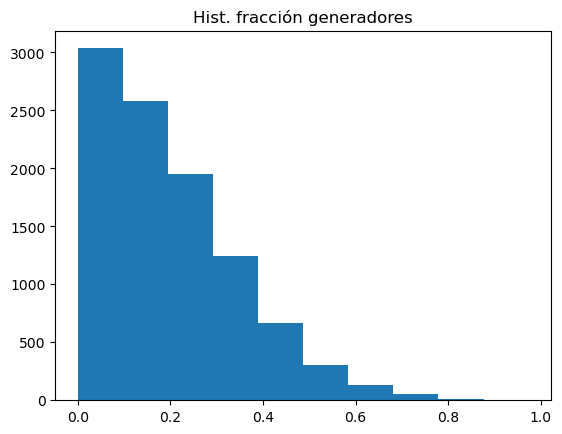

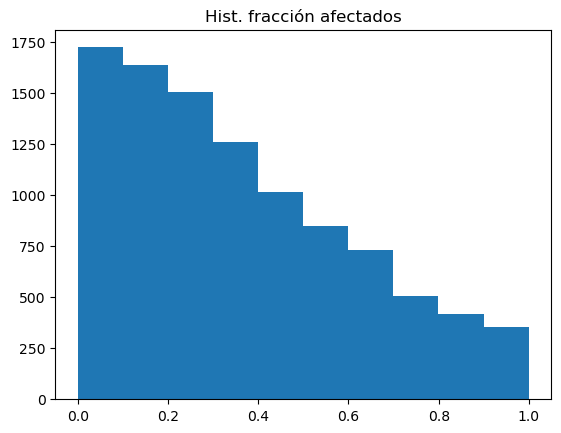

In [5]:
grafunctions2.grafico1(0, 0.25, 10000, 'Hist. fracción generadores')
grafunctions2.grafico1(0.25, 0.39, 10000, 'Hist. fracción afectados')

#### 2.3.4.2 Fracciones de Utilidad Ofrecida <a name="2.3.4.2"></a>

Al igual que la fraccion anterior este es un valor sampleado de una distribucion normal normalizado entre 0 y 1. Al igual que la fraccion anterior se utiliza para definir un porcentaje de la utilidad que representa realizar una adquisición de derechos de contaminación. La diferencia principal es que la varianza que se utiliza es mucho menor, y la media de esta fraccion se va modificando a medida que se a un agente le rechazan ofertas.

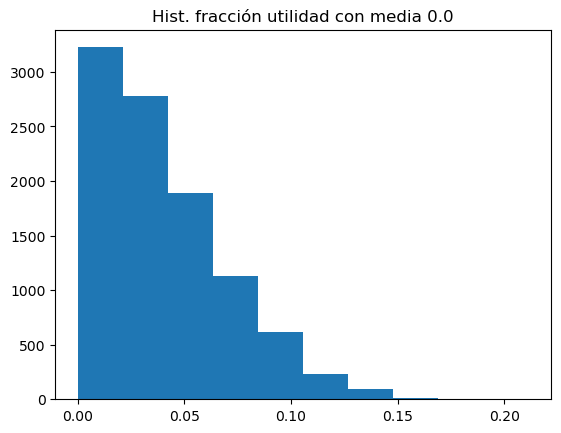

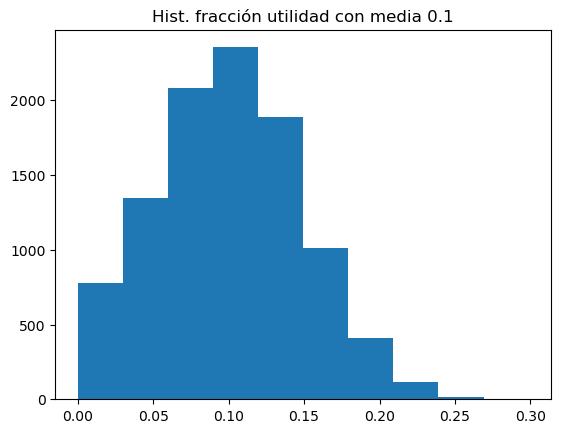

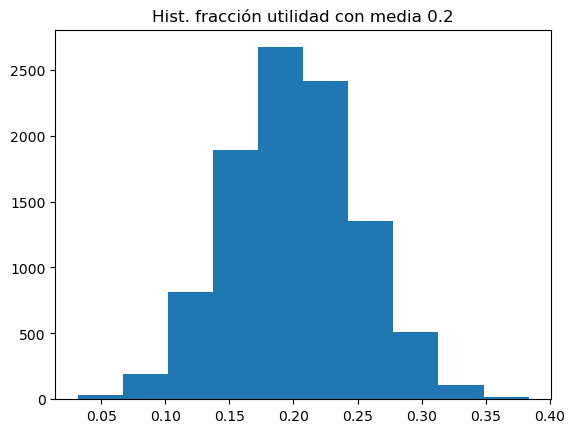

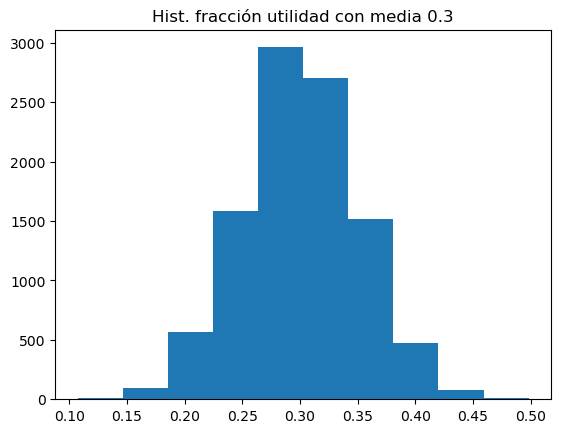

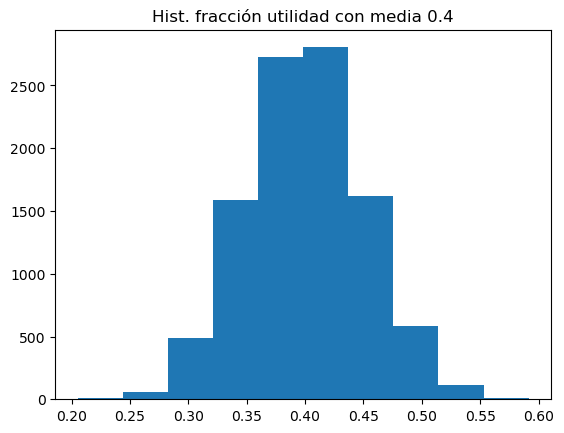

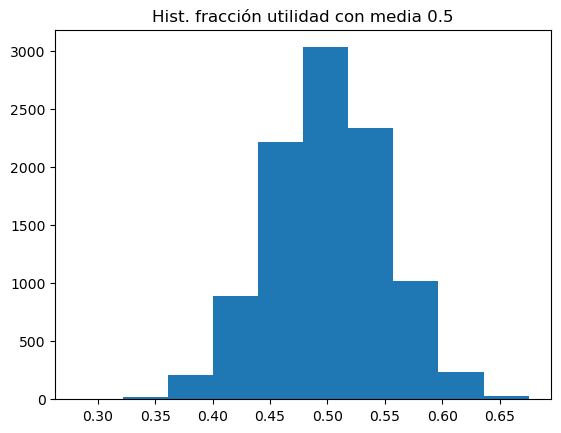

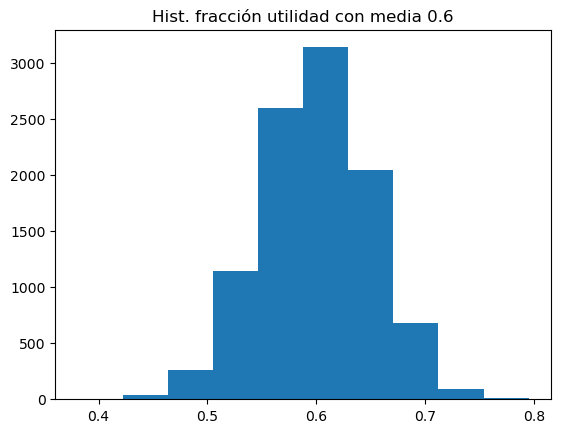

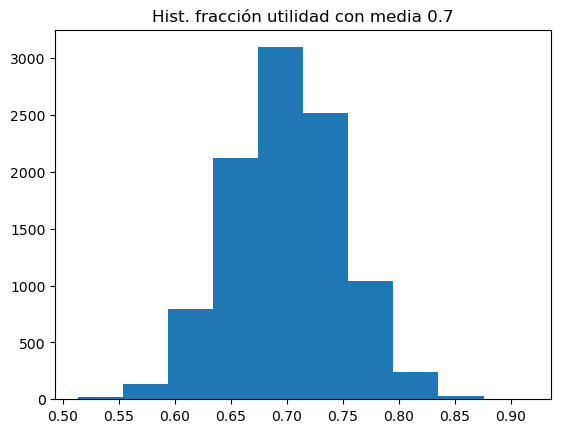

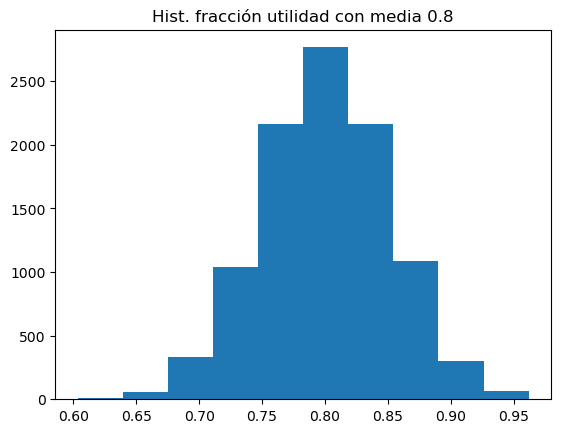

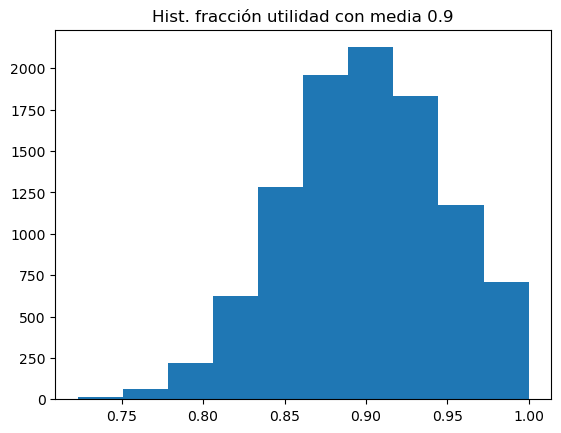

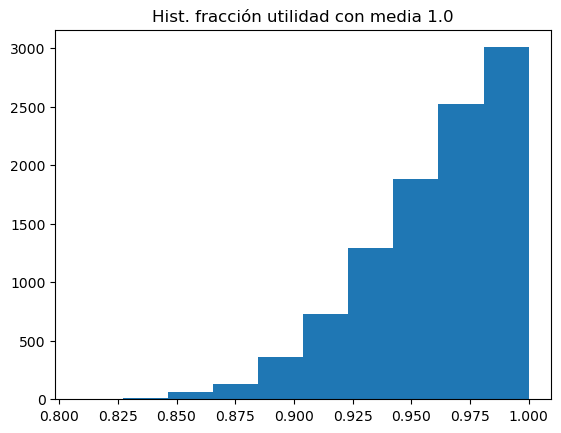

In [8]:

for i in range(11):
    grafunctions2.grafico1(i/10, 0.05, 10000, f'Hist. fracción utilidad con media {i/10}')

#### 2.3.4.3 Graficos de Curvas de Utilidad <a name="2.3.4.3"></a>
Las curvas de utilidad son las funciones originales de cada agente las cuales luego son discretizadas en las distintas tablas de utilidad. Estas curvas tienen derivada monotonamente decreciente para reperesentar el concepto de utilidad marginal.

Para realizar dichos gráficos debemos definir primero una lista de agentes.

In [6]:
cantidad_agentes = 100
proporcion_afectados = 0.5
submultiplicador_afectados = 400
multiplicador_de_utilidad = 1000
contaminacion_maxima = 100   

agentes=grafunctions2.crear_agentes(cantidad_agentes, proporcion_afectados, submultiplicador_afectados, multiplicador_de_utilidad, contaminacion_maxima)

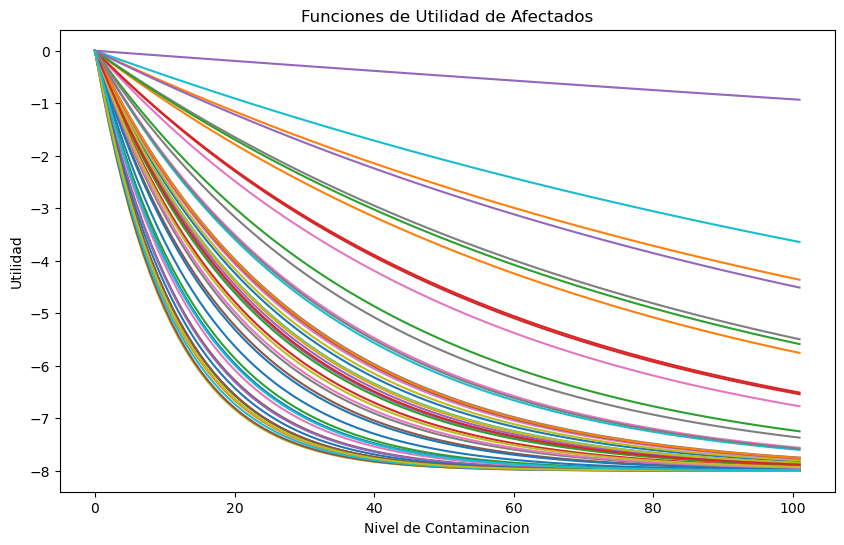

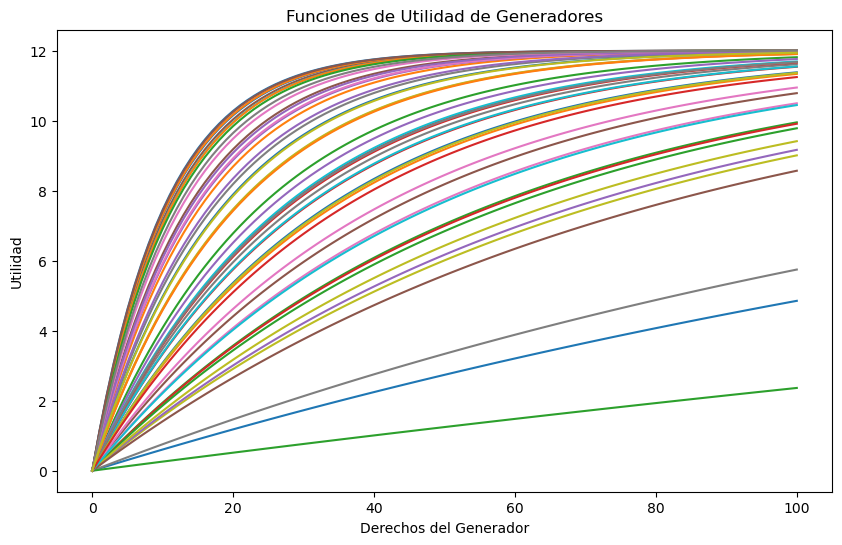

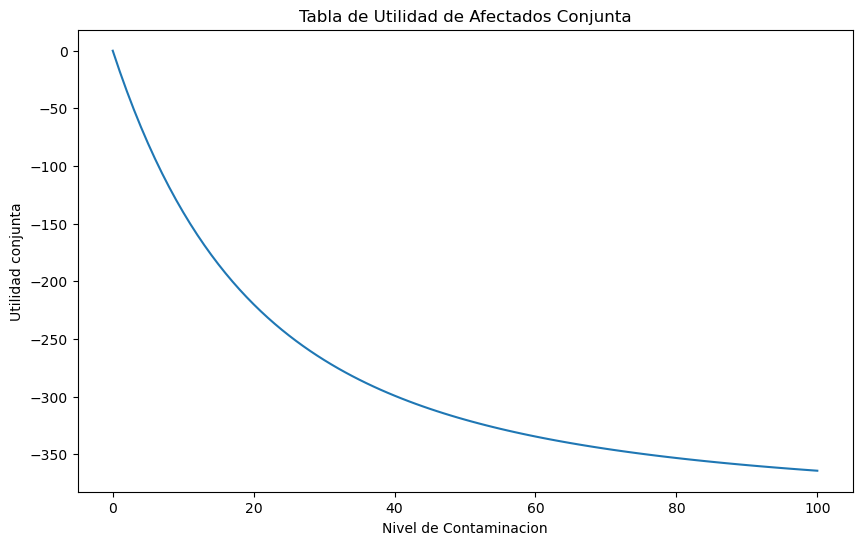

In [7]:
grafunctions2.grafico2(agentes)

## 3 - La Simulación <a name="3"></a>

### 3.1 Observaciones <a name="3.1"></a>
A lo largo de esta sección realizaremos diversas metricas para estudiar el comportamiento del modelo con el proposito de poder verificar si nuestra hipotesis es correcta. 

In [1]:
import grafunctions3

#### 3.1.1 Tenencia de Derechos en Base al Costo de Transacción <a name="3.1.1"></a>

Estos graficos muestran la tenencia de derechos para cada uno de los tipos de agentes bajo distintos costos de transacción. Se realizan los graficos para 4 costos distintos, y para cada costo de transaccion se realizaron 5 simulaciónes. Los graficos pueden verse abarrotados, pero el aspecto importante de ellos son los saltos de una curva de cantidad de derechos de cero a cien, y como la mayoria de las veces que se estabiliza el sistema, lo logra en estos estados. La utilidad total del sistema es de 5000.

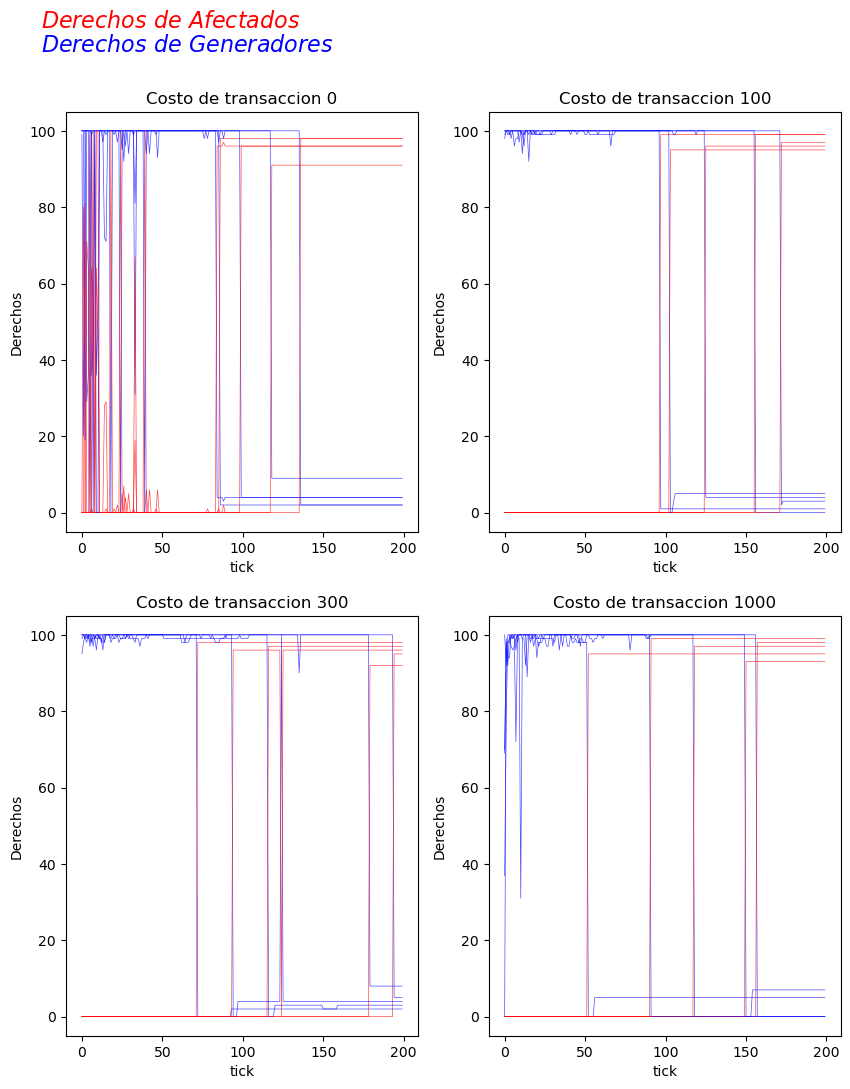

In [4]:
grafunctions3.graficar1()

Para los costos de transacción parece repetirse un patrón en común en las simulaciones, en principio se le asigna todos los derechos de propiedad al conjunto de generadores durante varios ticks hasta que en un tick dado los afectados obtienen una gran cantidad de derechos. Estos resultados parecen razonables con el modelo dado ya que en un principio, la contaminación es 0 por lo que es esperable que los generadores se apropien de todos los derechos aumentando la contaminación. Luego, la dinámica de formación de grupos de los afectados se acelera por la alta contaminación hasta el punto en que se forma un grupo que consigue dar una oferta competitiva adquiriendo varios derechos de propiedad.

Se observó en la experimentación que a mayor costos de transacción, parece haber una tendencia más marcada del sistema a converger en una asignación de derechos que favorece mayoritariamente a los afectados. En particular, se observa que con costos de transacción nulos la asignación de derechos estable en el sistema parece favorecer más a los generadores o afectados con la misma probabilidad. Una tendencia que parece repetirse para todo costo de transacción es que en la estabilización del sistema, la repartición de los derechos no parece ser equitativa entre afectados y generadores, sino que tiende a asignar una mayoría de derechos al grupo de afectados o de generadores.

La tendencia a favorecer a los afectados con costos de transacción altos puede interpretarse mediante la formación de grupos de los afectados que se presenta como una ventaja característica frente a los generadores ya que la formación de grupos no solo permite obtener utilidades más altas para los grupos, sino que permite disminuir la distancia al propietario, y consigo el costo de transacción, permitiéndoles realizar ofertas más competitivas.

Cuando los costos de transacción son nulos o bajos, esta ventaja se hace insignificante provocando que la convergencia de la asignación de los derechos dependa de parámetros aleatorios del modelo como la topología del grafo, o las funciones de utilidad de los agentes.

#### 3.1.2 Topología del Grafo <a name="3.1.2"></a>

Buscamos explorar el efecto de la topologia del grafo cuando los costo de transacción son especialmente altos.

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


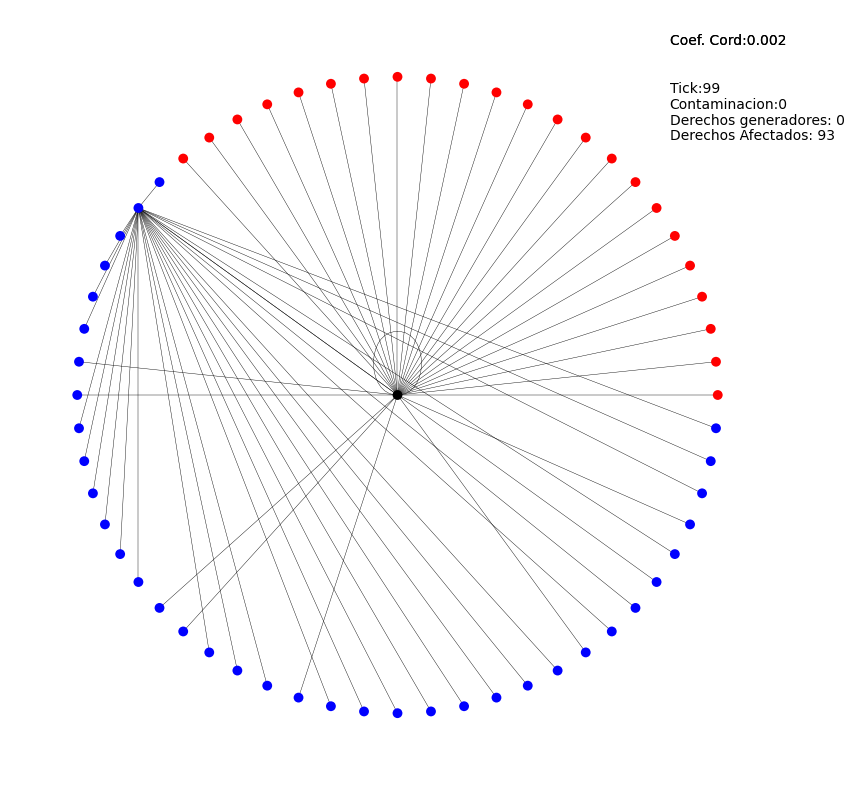

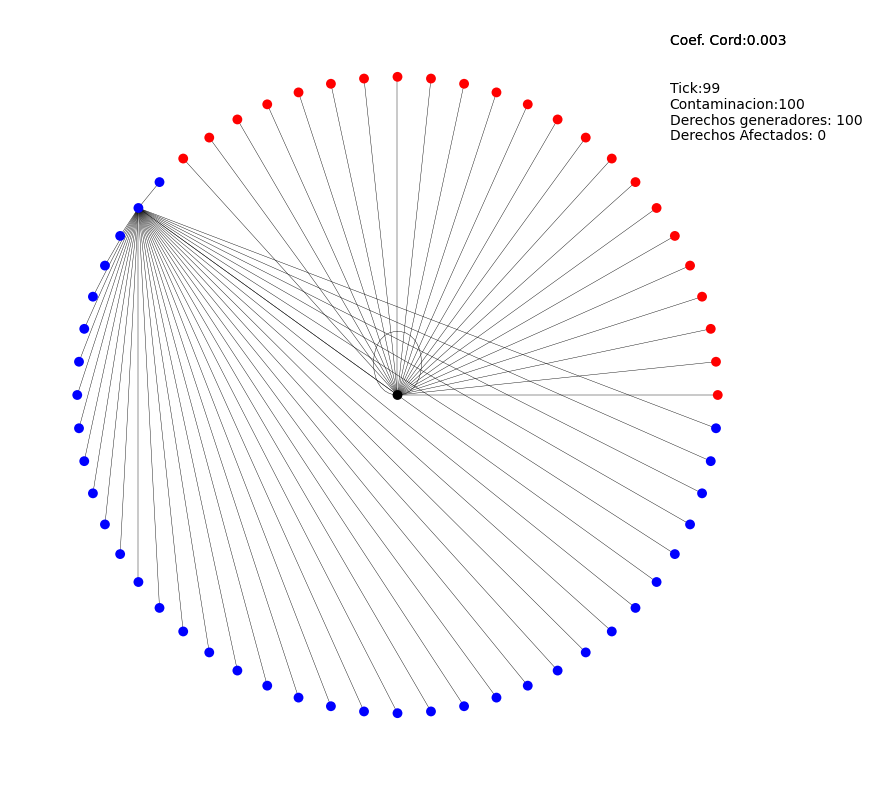

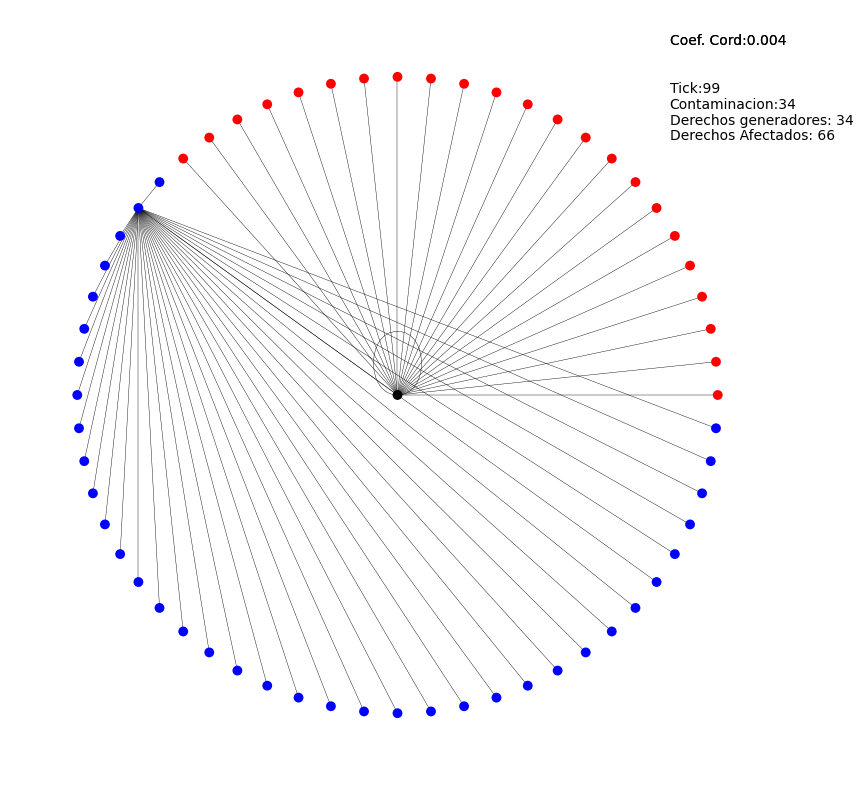

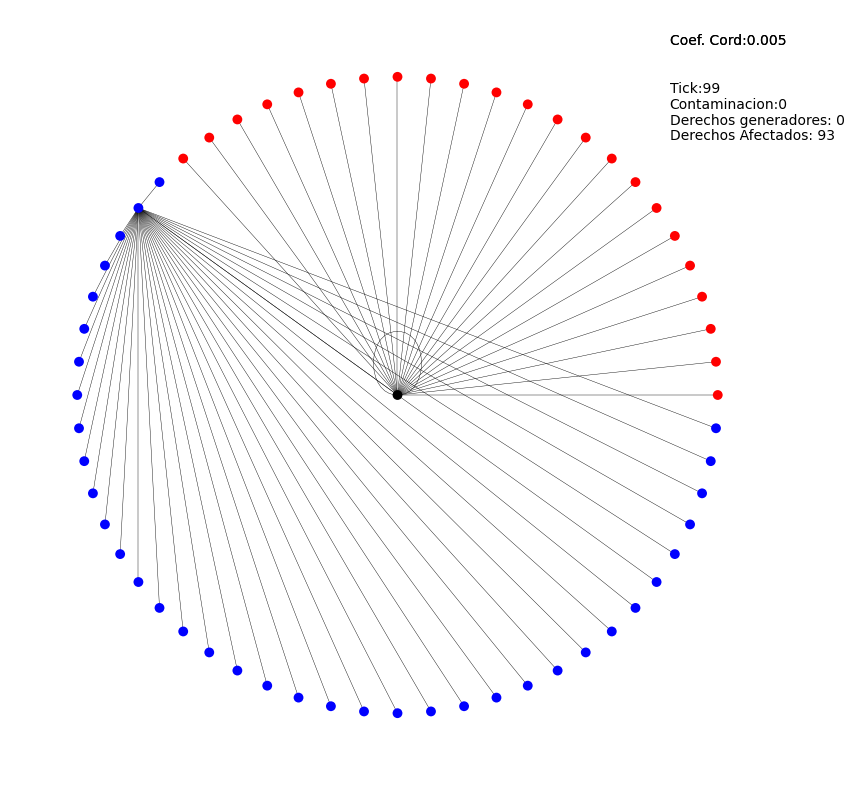

In [3]:
for i in range(4):
    grafunctions3.graficar2(0.002+i*0.001, f'grafico{i+1}.gif')

Ejecutar los siguientes markdowns posteriormente a generar los graficos:

![SegmentLocal](grafico1.gif "segment")

![SegmentLocal](grafico2.gif "segment")

![SegmentLocal](grafico3.gif "segment")

![SegmentLocal](grafico4.gif "segment")

De haber problema con las animaciones estas son guardadas en la carpeta del notebook bajo sus respectivos nombres como gifs.

A medida que va evolucionando el sistema y el tamaño de los grupos de los generadores alcanza cierto punto critico, la distribución de derechos adquiere un comportamiento similar al de cambio de fase, pasando la mayoria si no la totalidad de los derechos a ser adquiridos por afectados. Con esto podemos atribuirle los saltos fuertes en distribucion de derechos en el caso de contaminacion alta, al incremento repentino del tamaño de un grupo.

### 3.1.3 Metricas Varias de la Simulación <a name="3.1.3"></a>
Para poder visualizar las simulaciones, debido a la gran cantidad de datos que una unica instancia contiene, utilizamos el siguiente gráfico de métricas, el cual nos permite entender de manera sencilla que es lo que esta sucediendo.

In [1]:
import grafunctions3
cantidad_agentes = 100
proporcion_afectados = 0.5
densidad_grafo = 0.5
costo_transaccion = 10
submultiplicador_afectados = 550
multiplicador_de_coordinacion = 0.0004   
multiplicador_de_utilidad = 1000
cantidad_de_ticks= 300

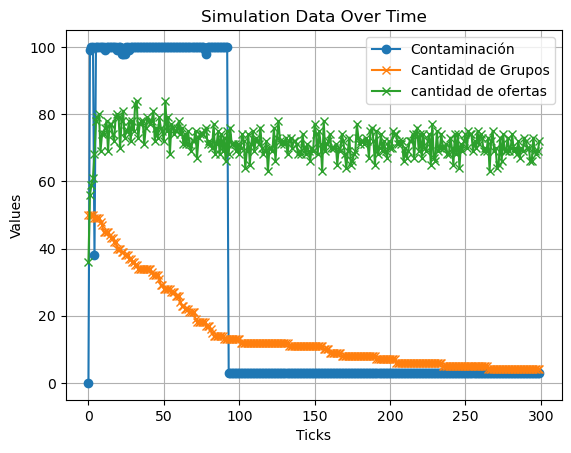

In [2]:
grafunctions3.graficar3(cantidad_agentes, proporcion_afectados, densidad_grafo, costo_transaccion, submultiplicador_afectados, multiplicador_de_coordinacion, multiplicador_de_utilidad, cantidad_de_ticks)

Reiniciar el kernel para correr nuevamente

### 3.1.4 Diferencia con Respecto a las Utilidades Teóricas <a name="3.1.4"></a>
En esta sección quisimos graficar la diferencia de la suma de las utilidades totales de todos los agentes en la simulación con respecto a la utilidad total optima, a medida que se va incrementando el costo de transacción.

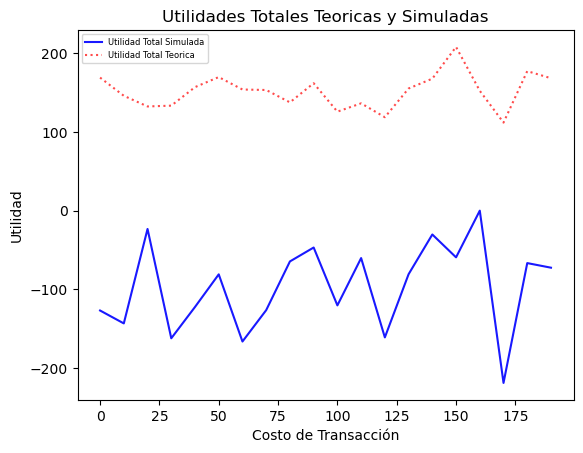

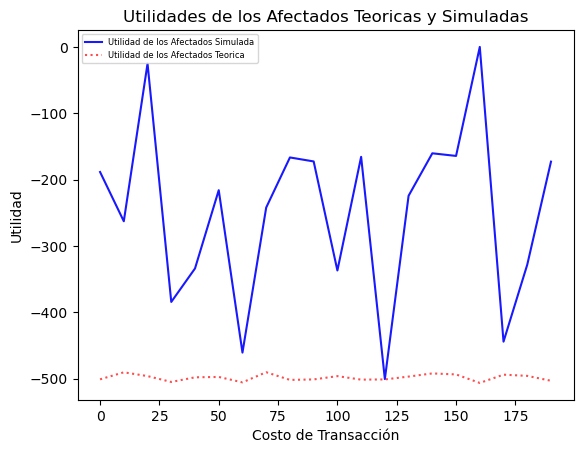

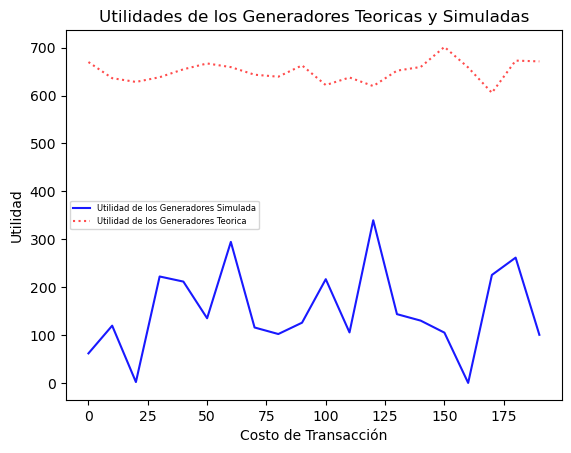

In [2]:
grafunctions3.graficar4()

Lo que podemos observar es antintuitivo en un principio, si el submultiplicador de utilidad de los afectados es bajo, osea si los generadores tienen mas utilidad disponible en su curva, la disancia entre las utilidades optimas y las conseguidas por la simulación parecen ser invariantes a los costos de transacción. A medida que se va incrementando el submultiplicador de los afectados, ergo, las curvas de utilidad de los afectados tienen mayor peso, el sistema parece tender lentamente al óptimo, lo cual tambien pareciera no tener sentido. Finalmente logramos crear las siguientes explicaciones a los eventos. Cuando el submultiplicador aumenta, el sistema se acerca al óptimo debido a que los generadores tienen menor acceso a realizar ofertas, por lo que la contaminacion sera mas baja, y como la suma de las curva de utilidades de los afectados pesa mas debido al submultiplicador siendo mas grande, el óptimo estara mas cerca de un nivel de contaminacion 0.
En el resto de los casos, sospechamos que la naturaleza binaria de los resultados de nuestro modelo evitan la capacidad de ver una convergencia "continua".


### 3.2 - Intepretación <a name="3.2"></a>
### 3.2.1 - Confirmación de la Hipótesis <a name="3.2.1"></a>
En el peor de los casos nuestra hipotesis era incorrecta y en el mejor de ellos nuestra hipotesis resulta no abordable mediante este modelo, nosotros particularmente nos inclinamos a la ultima opción.



### 3.2.2 - Conclusiones y Aplicabilidad <a name="3.2.2"></a>
Las conclusiones de este modelo serian las siguientes. Principalmente, a menor costo de transacción el modelo se vuelve mas vólatil, y mientras los costos de transacción se ven incrementados, el tipo de agente que es capaz de organizarse e incrementar asi su capacidad de negociación, mediante el incremento de su utilidad grupal, o lograr una mejoria en las condiciones de costo de transacción, se ve fuertemente beneficiado. Esto en un contexto real implicaria que a medida que se incumple el supuesto de costos de transacción nulos, los agentes adversos a la externalidad se ven en una posición beneficiosa. En la realida no esperariamos que pase eso, nosotros esperariamos que al elevar los costos de transacción, los beneficiados sean los que reciban inicialmente los derechos, actuando esto como una barrera ante nuevas ofertas. Aunque esto sigue sucediendo en casos en los que el costo de transacción es tan alto que directamente no se hacen ofertas. Esto se lo podriamos asignar a la tendencia asintotica del modelo a generar grupos cada vez mas grandes.

### 3.3 - Posibles Pasos Futuros <a name="3.3"></a>
Hay muchos pasos futuros que se pueden tomar con este modelo. Un posible camino de desarrollo para el modelo seria cambiar los sistemas de generación de ofertas para cada agente, esto seria relativamente facil de implementar debido a la modularidad del sistema, hacer esto puede presentar resultados menos sensibles a los parametros del modelo, e incluso un modelo que no presente un comportamiento semejante al de cambio de fase. Otro posible camino de desarrollo que realmente nos gustaria implementar pero que vimos virtualmente imposible por inconveniencias seria cambiar el sistema de grupos. Ahora mismo la mayoria de la complpejidad del codigo radica en este sistema, nos gustaria poder simplificarlo e incluso cambiar la filosofía de este formando grupos que se separen. Una primera inconveniencia de cambiar esto seria que nosotros no logramos encontrar una arguementacion lógica para explicar el proceso de decisión de los agentes para la separación de un grupo. Este tipo de cambio tambien tendria sus consecuencias implementativas, en el sentido de casos complejos que surgen a la hora de separar un grupo. Por ejemplo, sea un grupo de afectados, considerese el conjunto de nodos de dicho grupo y el grafo inducido por dicho conjunto de nodos, si por alguna heuristica se termina decidiendo que un nodo se va a separar del grupo ¿Como se procederia en el caso de que el nodo sea un nodo de articulación del grafo inducido por grupo? ¿El grupo se separa en dos o tres? ¿Como se reparten los derechos si dicho grupo tiene una oferta en pie? Otra cosa que podria causar cambiar el sistema de grupos es que la estructura topologica deje de ser relevante en si misma, importando nada mas las pertenencias a grupos. Una solución mas bruta tal vez seria ponerle una cota al tamaño de los grupos, pero ciertamente la tendencia asintotica de que todos los generadores generen un unico grupo mientras que el nivel de contaminacion no sea cero no es muy realista. Nos gustaria tambien analizar la distribución de derechos dado un conjunto de agentes y una topologia de grafo fija, y de esta manera ver porque la convergencia parece darse tan "rapido" 